In [ ]:
#Nama: Muhammad Khanif Naufal
#NIM : A11.2022.14180
#Kelas: Bengkel Koding Data Science 01

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#memuat dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/dataset/ObesityDataSet.csv', na_values=' ?')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# 1. Menampilkan beberapa baris pertama dan informasi umum dataset
print("Beberapa baris pertama dataset:")
print(data.head())

print("\nInformasi Umum Dataset:")
data_info = data.info()

Beberapa baris pertama dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        N

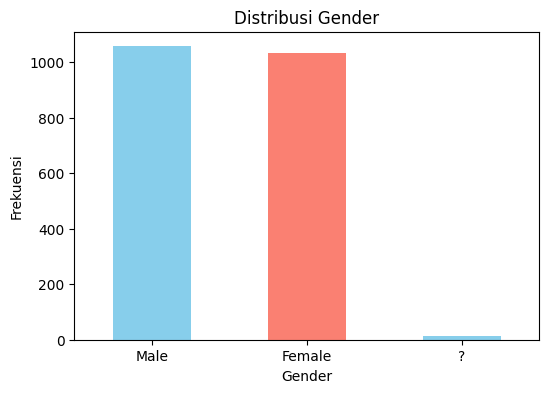

In [10]:
# 2. Tampilkan Visualisasi Data
# Visualisasi distribusi Gender
plt.figure(figsize=(6, 4))
data['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

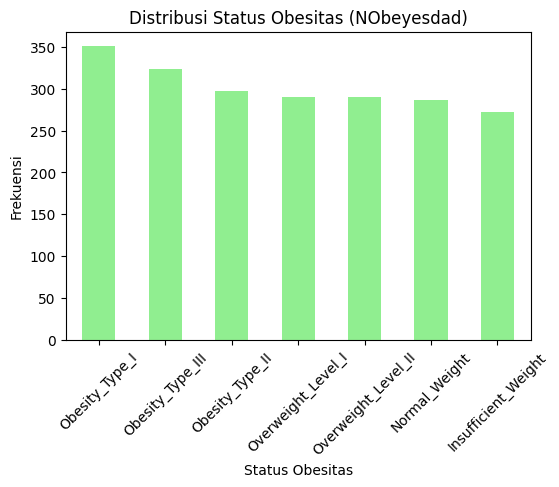

In [11]:
# Visualisasi distribusi status obesitas (NObeyesdad)
plt.figure(figsize=(6, 4))
data['NObeyesdad'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribusi Status Obesitas (NObeyesdad)')
plt.xlabel('Status Obesitas')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

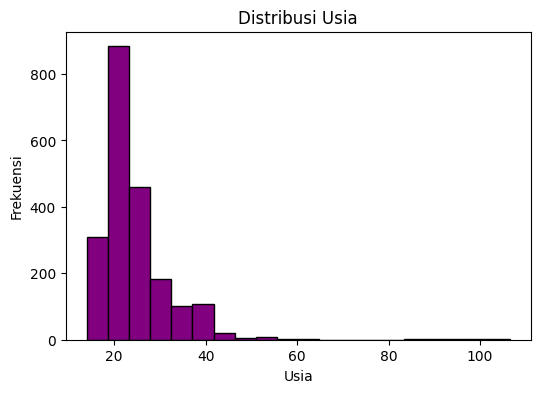

In [12]:
# Visualisasi distribusi usia (Age)
plt.figure(figsize=(6, 4))
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Convert Age to numeric
data['Age'].dropna().plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


In [13]:
# 3. Cek keberadaan missing values, unique value, data duplikat, keseimbangan data, dan deteksi outlier menggunakan boxplot

# Cek missing values
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# Cek unique values per kolom
print("\nJumlah unique values per kolom:")
print(data.nunique())

# Cek duplikasi data
duplicates = data.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")

# Cek keseimbangan data (misal untuk NObeyesdad)
print("\nDistribusi NObeyesdad:")
print(data['NObeyesdad'].value_counts())


Jumlah missing values per kolom:
Age                               22
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah unique values per kolom:
Age                               1393
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP               

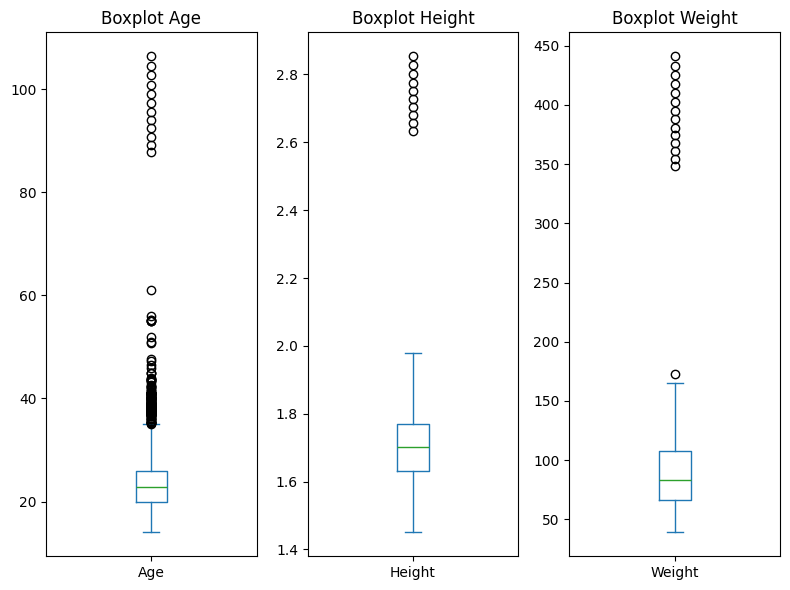

In [14]:
# Deteksi outlier menggunakan boxplot untuk variabel numerik
numeric_cols = ['Age', 'Height', 'Weight']
plt.figure(figsize=(8, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric
    data[col].dropna().plot(kind='box')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Berdasarkan hasil EDA yang telah dilakukan, dapat disimpulkan beberapa hal penting terkait dataset ini:

1. Kondisi Data
Terdapat beberapa missing value di berbagai kolom seperti Age, Height, Weight, dan lainnya. Selain itu, ditemukan 18 data duplikat yang sebaiknya dihapus. Pada kolom Gender juga ditemukan nilai yang tidak valid ('?'), sehingga perlu dibersihkan sebelum analisis lebih lanjut.

2. Distribusi Data
Distribusi jenis kelamin cukup seimbang antara laki-laki dan perempuan, namun ada sedikit data yang tidak valid. Distribusi status obesitas (NObeyesdad) terbilang cukup merata, sehingga tidak ada masalah imbalance class yang berarti. Distribusi usia condong ke kelompok usia muda (sekitar 20-an tahun), dan terlihat adanya skew ke kanan dengan beberapa outlier di usia lanjut.

3. Outlier
Dari hasil boxplot, ditemukan banyak outlier terutama pada kolom Age, Height, dan Weight. Beberapa nilai ekstrem, seperti berat badan lebih dari 400 kg dan tinggi badan di atas 2.6 meter, terlihat tidak wajar dan kemungkinan besar merupakan data yang salah.

4. Jumlah Nilai Unik
Sebagian besar kolom kategorikal memiliki jumlah nilai unik yang masuk akal. Untuk kolom numerik seperti TUE, FAF, dan CH2O, terdapat variasi yang cukup tinggi dan ini bisa menjadi fitur yang berguna dalam proses pemodelan.

5. Kesimpulan Akhir
Secara umum, dataset ini sudah cukup baik untuk digunakan dalam analisis klasifikasi status obesitas. Namun, sebelum digunakan untuk modeling, perlu dilakukan pembersihan data terlebih dahulu: menangani missing value, menghapus duplikat, memperbaiki nilai yang tidak valid, dan menangani outlier. Kondisi distribusi kelas target yang cukup seimbang menjadi nilai tambah dalam membangun model klasifikasi yang stabil dan adil.